Name: Amy Qi

UNI: xq2224

# MNIST Sign Language

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [89]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu'))

        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(rate=0.2))
        model.add(Dense(25, activation='softmax')) # for 25 classes

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        self.model = model

    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        images_reshaped = np.array([np.reshape(curVec/255.0,(28,28,1)) for curVec in images])

        x_train, x_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size=0.2, shuffle=True)

        # print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

        self.data = {
            "train": (x_train, y_train),
            "test": (x_test, y_test)
        }


    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        self.model.summary()
        history = self.model.fit(self.data['train'][0], self.data['train'][1],
                                 validation_data=self.data['test'], batch_size=batch_size,
                                 epochs=epochs, verbose=verbose)
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        data_reshaped = np.array([np.reshape(curVec/255.0,(28,28,1)) for curVec in data])
        return np.argmax(self.model.predict(data_reshaped), axis=1)


    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [90]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [91]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

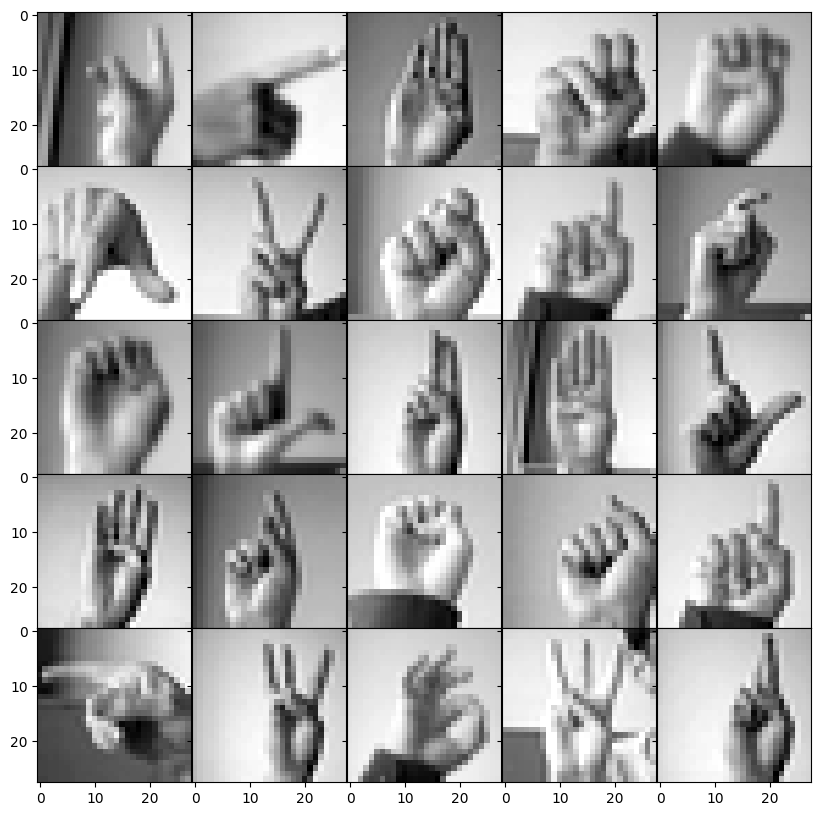

In [92]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_72 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 7, 7, 64)          102464    
                                                                 
 max_pooling2d_73 (MaxPooli  (None, 3, 3, 64)        

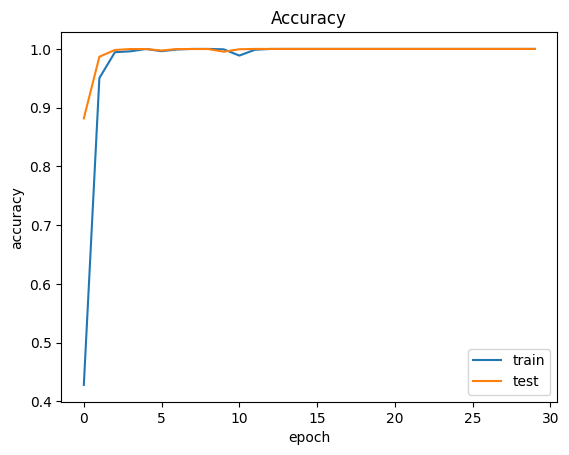

In [93]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [94]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 2ms/step
0.9619353039598438
